# Bec's Bath Problem


In episode 052 Bec had to answer the problem "How do you keep a bath warmer for longer?" and asked the audience to test her theory about bubble baths.

I would like to apologise in advance for not getting back earlier to you, but as a new dad I have not a lot of time on my hands.

In order to not waste a lot of water, I chose a small bowl - by a company which rhymes with SupperStare - which is designed to keep food like noodles or potatoes hot for longer so it's well insulated to the sides and bottom. I put in 2 litres of water with a temperature of bigger than 43 °C and did four measurements, two without any bubbles and two with a "Mermaids only bubble bath". I also measured the ambient air temperature, which fluctuated around 24 °C (it was in my tiny office and there are PCs running, no additional heating required). After measuring, I aligned the data to all start at 43 °C and plotted an interval of one hour. As you can see, the "bath" with the bubbles ended up about 2 K hotter than the one without.

Measure Equipment:
* Raspberry Pi 4
* 3 DS1820 temperature sensors (1 Air, 2 Water)

You can find the source code for plotting as well as a spreadsheet for Matt with all the raw data at https://github.com/tinnuadan/PipingHotBath.


Text(0, 0.5, 'T [°C]')

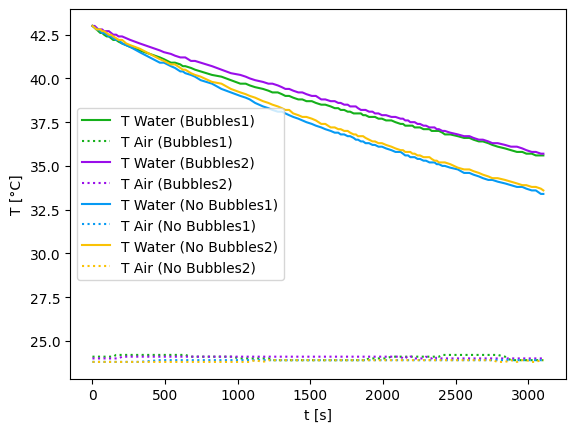

In [99]:
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd


def GetDF(which: str):
  xlsx = pd.ExcelFile("./BecBath.xlsx")
  df = pd.read_excel(xlsx, which)

  df = df.rename(columns={"T_air [m°C]": "T_air", "T_water1 [m°C]": "T_water_1", "T_water2 [m°C]": "T_water_2", "T_water_mean [m°C]": "T_water_mean", "t [s]": "t"})
  idx = (df[df.T_water_mean > 43000].iloc[0])
  idx = df[df.T_water_mean <= 43000].iloc[idx.name]
  unixtime = df.iloc[idx.name].Unixtime
  idx_end = df[df.t > idx.t+3600].iloc[idx.name]
  df['t'] = df['Unixtime']-unixtime
  df = df.iloc[idx.name:(idx_end.name-idx.name)]
  df['T_air'] = round(df['T_air']/1000,1)
  df['T_water_mean'] = round(df['T_water_mean']/1000,1)
  df = df.set_index('t')
  return df

def GetT():
  data = {'t' : range(0,3600)}
  df = pd.DataFrame(data=data)
  return df


df = GetT()
df_bubbles1 = GetDF("Bubbles1")
df_bubbles2 = GetDF("Bubbles2")
df_nob1 = GetDF("NoBubbles1")
df_nob2 = GetDF("NoBubbles2")
df.insert(1, "Bubbles1Air",   df_bubbles1['T_air'])
df.insert(2, "Bubbles1Water", df_bubbles1['T_water_mean'])
df.insert(3, "Bubbles2Air",   df_bubbles2['T_air'])
df.insert(4, "Bubbles2Water", df_bubbles2['T_water_mean'])
df.insert(5, "NoBubbles1Air",   df_nob1['T_air'])
df.insert(6, "NoBubbles1Water", df_nob1['T_water_mean'])
df.insert(7, "NoBubbles2Air",   df_nob2['T_air'])
df.insert(8, "NoBubbles2Water", df_nob2['T_water_mean'])
df = df.dropna()
df = df.iloc[::5, :]
df = df.set_index('t')

plt.figure()
plt.plot(df.index, df.Bubbles1Water, "-", label="T Water (Bubbles1)", color="xkcd:green")
plt.plot(df.index, df.Bubbles1Air,   ":", label="T Air (Bubbles1)",   color="xkcd:green")
plt.plot(df.index, df.Bubbles2Water, "-", label="T Water (Bubbles2)", color="xkcd:violet")
plt.plot(df.index, df.Bubbles2Air,   ":", label="T Air (Bubbles2)",   color="xkcd:violet")
plt.plot(df.index, df.NoBubbles1Water, "-", label="T Water (No Bubbles1)", color="xkcd:azure")
plt.plot(df.index, df.NoBubbles1Air,   ":", label="T Air (No Bubbles1)",   color="xkcd:azure")
plt.plot(df.index, df.NoBubbles2Water, "-", label="T Water (No Bubbles2)", color="xkcd:goldenrod")
plt.plot(df.index, df.NoBubbles2Air,   ":", label="T Air (No Bubbles2)",   color="xkcd:goldenrod")
plt.legend()
plt.xlabel("t [s]")
plt.ylabel("T [°C]")